In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
# for Coefficient of Determination function
def cd(y_predicted, y_test):
    u = ((y_test - y_predicted) ** 2).sum()
    v = ((y_test - y_test.mean()) ** 2).sum()
    return (1 - u/v)

In [5]:
# step_gradient function
def step_gradient(data, y_train, learning_rate, m):
    # break data into x and y
    m_slope = np.zeros(14)
    #c_slope = 0
    M = len(data)
    for i in range(M):
        x = data[i, 0:14]
        y = y_train[i]
        ans = 0
        # use one more loop to loop over each m value
        for j in range(14):
            #m_slope[j] += (-2 / M) * (y - m[j] * x[j] - m[size]) * x[j]
            #c_slope += (-2 / M) * (y - m[j] * x[j] - m[size]) 
            ans += x[j] * m[j]
        for k in range(14):
            m_slope[k] += (-2 / M) * (y - ans) * x[k]
    new_m = m - learning_rate * m_slope
    return new_m

In [6]:
# gradient descent:
def gd(data, learning_rate, iterations):
    # create the m array including c which means m[size] = c
    m = np.zeros(14)
    y_train = data[:, 14]
    #print("Y train: ", y_train)
    for i in range(iterations):
        m = step_gradient(data, y_train, learning_rate, m)
    return m    

In [7]:
def run():
    #print(X)
    train_data = np.genfromtxt("Boston_train.csv", delimiter = ",")
    iterations = 10000000
    learning_rate = 0.0001
    scaler = preprocessing.StandardScaler()
    X = train_data[:, 0:14]
    #print("X: ", X)
    #scaler.fit(X)
    #X = scaler.transform(X)
    #train_data[:, 0:13] = X
    Y = train_data[:, 14]
    print(train_data)
    print(train_data.shape)
    print(X.shape)
    print(Y.shape)
    M = gd(train_data, learning_rate, iterations)
    m = M[0:13]
    c = M[13]
    print(m)
    print(c)
    Y_train_predicted = np.zeros(train_data.shape[0])
    print(Y_train_predicted.shape)
    for i in range(train_data.shape[0]):
        temp = 0
        x = X[i, 0:14]
        for j in range(14):    
            temp += (M[j] * x[j])
        Y_train_predicted[i] += (temp)      
    np.savetxt("Y_Boston_train_predicted.csv", Y_train_predicted, fmt = "%0.5f", delimiter=",")
    a = np.arange(0 , 379*50, 50)
    plt.scatter(a, Y, color="blue")
    plt.scatter(a, Y_train_predicted, color="red")
    plt.show()
    # for testing data
    test_data = np.genfromtxt("Boston_test.csv", delimiter = ",")
    #test_data = scaler.transform(test_data)
    Y_test_predicted = np.zeros(test_data.shape[0])
    #Y_train_predicted = M * test_data
    print(Y_test_predicted.shape)
    for i in range(test_data.shape[0]):
        temp = 0
        x = test_data[i, 0:14]
        for j in range(14):    
            temp += (M[j] * x[j])
        Y_test_predicted[i] += (temp)
    np.savetxt("Y_Boston_test_predicted.csv", Y_test_predicted, fmt = "%0.1f", delimiter=",")
    score_train = cd(Y_train_predicted, Y)
    print(score_train)

[[-0.40784991 -0.48772236 -1.2660231  ... -1.09799011  1.
  37.9       ]
 [-0.40737368 -0.48772236  0.24705682 ... -0.52047412  1.
  21.4       ]
 [ 0.1251786  -0.48772236  1.01599907 ...  0.89107588  1.
  12.7       ]
 ...
 [-0.40831101 -0.48772236  0.24705682 ... -0.33404299  1.
  20.8       ]
 [-0.41061997 -0.48772236 -1.15221381 ... -0.74475218  1.
  22.6       ]
 [ 0.34290895 -0.48772236  1.01599907 ... -1.35871335  1.
  50.        ]]
(379, 15)
(379, 14)
(379,)
[-0.93808077  0.74103443  0.01169157  0.78087372 -2.1745575   2.35429653
  0.1233381  -2.95232355  2.53296817 -1.7029037  -2.25151962  0.58835429
 -4.26368155]
22.67723326386723
(379,)


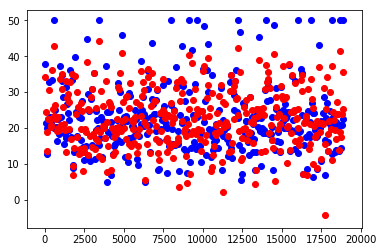

(127,)
0.7331366627280995


In [8]:
run()